In [2]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
from Bio import SeqIO
import re

#### Read Final GCA(After All Step 3510 peptides)

In [4]:
GCA = pd.read_table("tables/count-tables/peps_gene_symbol.tsv")

In [5]:
GCA

,sequence_x,protein_accessions,peptidoform,gene_symbol
0,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,AAAAAAAAAPAAAATAATTAATTAATAAQ,SRP14
1,AAAAPAPPAGPR,GCA_161748,AAAAPAPPAGPR,PLK3
2,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,GCA_60405,AAAGDLGGDHLAFSC[Carbamidomethyl]DVAKEHDVQNTFEEMEK,CBR4
3,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,GCA_60405,AAAGDLGGDHLAFSC[Carbamidomethyl]DVAKEHDVQ[Deam...,CBR4
4,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,GCA_60405,AAAGDLGGDHLAFSC[Carbamidomethyl]DVAKEHDVQ[Deam...,CBR4
...,...,...,...,...
6203,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,GCA_170013,YWC[Carbamidomethyl]NDGKN[Deamidated]PGAVNAC[C...,LYZ
6204,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,GCA_170013,YWC[Carbamidomethyl]NDGKN[Deamidated]PGAVN[Dea...,LYZ
6205,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,GCA_170013,YWC[Carbamidomethyl]NDGKN[Deamidated]PGAVNAC[C...,LYZ
6206,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQ[Dea...,TPSAB1


In [6]:
GCA = GCA[["sequence_x"]]
GCA = GCA.drop_duplicates()
GCA = GCA.rename(columns= {"sequence_x":"sequence"})
GCA

,sequence
0,AAAAAAAAAPAAAATAATTAATTAATAAQ
1,AAAAPAPPAGPR
2,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK
7,AAAGLPLVPR
8,AAAPAPVSEAVSR
...,...
6194,YVSLIYTNYEAGKDDYVK
6195,YVSLIYTNYEVGKDDYVK
6196,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK
6206,YWMHFCGGSLIHPQWVLTAAHCLGPDVK


#### PeptideAtlas

In [7]:
column_names = ['PeptideAccession', 'observations', 'best score', 'peptide sequence','']
PeptideAtlas = pd.read_table("PeptideAtlasInput_concat.PAidentlist.peptideSummary",header=None,names=column_names)

In [8]:
PeptideAtlas_dict = dict(zip(PeptideAtlas['peptide sequence'], PeptideAtlas['observations']))

In [9]:
PeptideAtlas_dict

{'PMKDETFGEYR': 14,
 'GLGTDEDTLIEILAS': 188,
 'MLFCSCQDQACAER': 260,
 'ALQQRLQGAEE': 3,
 'ALDWLALIYWDDDKR': 20,
 'SAGRQMIDNSYQVEKLAKDLDF': 1,
 'QASASYDSEEEEEGLPMS': 19,
 'SDVEDHSVHLLFSAN': 10,
 'NDDDKDDEIVFKQPISC': 3,
 'TLNHKLQDASAEVERLRRE': 1,
 'FSCGNGECIPR': 2,
 'QAELLLPGAEFHHYVGGPTETHVVR': 1384,
 'ATSAPAPGAPGGPQLA': 1,
 'TLRILFRPVASQLPRIFTSIGEDYDER': 1,
 'HLMHLELDISDSKIR': 43,
 'NELLGAGIEK': 45,
 'EETKFAQVVLQDLDKK': 3,
 'NAASSEEAKAEETGGGK': 132,
 'THVGMSIQTF': 7,
 'IYDPVCGTDGNTYPNECVLCFEN': 505,
 'SHMLTPFVEENLVSAAGGSISHQVSFSYFNAFNSLLNNMELVR': 43,
 'SDLNEVK': 20,
 'MKPAVDEMFPEGAGPYVDLDEAGGSTGL': 6,
 'VATQLPESTSLR': 75,
 'LTYLPYSMLNLK': 38,
 'DNISFPKQGS': 38,
 'ERTALFEEISRSGELAQEY': 2,
 'VDAVHLLKDHVGR': 124,
 'VKEVLFQHSGFQQS': 4,
 'AQLSDGNVGSGATG': 1,
 'SEAESLKGKLEEER': 3,
 'SVEEVASEIQPFLRG': 1,
 'DGCYCDSLENLADGYK': 24,
 'GYLSEGLVTK': 86,
 'RFEKPLEEKGEGGEFSV': 4,
 'SATSVSSAGEQAAGDPEGR': 3,
 'PQELVTAEVAAPSTSSSATSSPEGPSPARPPR': 8,
 'FPDLGQEVAL': 6,
 'DIAEFLIGQGAHVGAVNSEGDTPL': 16,
 'PFA

In [10]:
def getPeptideAtlasObservations(seq):
    if PeptideAtlas_dict.get(seq):
        return PeptideAtlas_dict.get(seq)
    else:
        return 0

In [11]:
GCA['PeptideAtlas_observations'] = GCA['sequence'].apply(getPeptideAtlasObservations)

In [12]:
GCA

,sequence,PeptideAtlas_observations
0,AAAAAAAAAPAAAATAATTAATTAATAAQ,835
1,AAAAPAPPAGPR,0
2,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,0
7,AAAGLPLVPR,0
8,AAAPAPVSEAVSR,3230
...,...,...
6194,YVSLIYTNYEAGKDDYVK,11216
6195,YVSLIYTNYEVGKDDYVK,8
6196,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,3
6206,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,781


#### GPMDB

In [13]:
len(set(GCA['sequence']))

3510

In [14]:
session = requests.Session()
def getApiRes(seq):
    url = 'https://rest.thegpm.org/1/peptide/count/seq='+seq
    response = session.get(url)
    if response.status_code == 200:
        if len(response.json()) == 1:
            return response.json()[0]
        else:
            return response.json()
    else:
        return "error"

In [15]:
getApiRes("SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK")

0

In [16]:
gpmdb_dict = {}
for i in tqdm(set(GCA['sequence'])):
    gpmdb_dict[i] = getApiRes(i)

100%|██████████| 3510/3510 [25:47<00:00,  2.27it/s]


In [17]:
len(gpmdb_dict)

3510

In [18]:
GCA['GPMDB_observations'] = GCA['sequence'].apply(gpmdb_dict.get)

In [19]:
GCA

,sequence,PeptideAtlas_observations,GPMDB_observations
0,AAAAAAAAAPAAAATAATTAATTAATAAQ,835,280
1,AAAAPAPPAGPR,0,0
2,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,0,0
7,AAAGLPLVPR,0,0
8,AAAPAPVSEAVSR,3230,0
...,...,...,...
6194,YVSLIYTNYEAGKDDYVK,11216,2787
6195,YVSLIYTNYEVGKDDYVK,8,437
6196,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,3,0
6206,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,781,0


#### Uniprot Extended proteomes

In [20]:
Uniprot_Extended_proteomes = "Uniprot_extended.fa"

In [21]:
seq_PE_dict = dict()
for j in tqdm(SeqIO.parse(Uniprot_Extended_proteomes, "fasta")):
    match = re.search(r'PE=(\d+)', j.description)
    if match:
        seq_PE_dict[str(j.seq)] = match[0]

FileNotFoundError: [Errno 2] No such file or directory: 'Uniprot_extended.fa'

In [39]:
seq_PE_dict

{'MEGSKTSNNSTMQVSFVCQRCSQPLKLDTSFKILDRVTIQELTAPLLTTAQAKPGETQEEETNSGEEPFIETPRQDGVSRRFIPPARMMSTESANSFTLIGEASDGGTMENLSRRLKVTGDLFDIMSGQTDVDHPLCEECTDTLLDQLDTQLNVTENECQNYKRCLEILEQMNEDDSEQLQMELKELALEEERLIQELEDVEKNRKIVAENLEKVQAEAERLDQEEAQYQREYSEFKRQQLELDDELKSVENQMRYAQTQLDKLKKTNVFNATFHIWHSGQFGTINNFRLGRLPSVPVEWNEINAAWGQTVLLLHALANKMGLKFQRYRLVPYGNHSYLESLTDKSKELPLYCSGGLRFFWDNKFDHAMVAFLDCVQQFKEEVEKGETRFCLPYRMDVEKGKIEDTGGSGGSYSIKTQFNSEEQWTKALKFMLTNLKWGLAWVSSQFYNK': 'PE=1',
 'MDNMSITNTPTSNDACLSIVHSLMCHRQGGESETFAKRAIESLVKKLKEKKDELDSLITAITTNGAHPSKCVTIQRTLDGRLQVAGRKGFPHVIYARLWRWPDLHKNELKHVKYCQYAFDLKCDSVCVNPYHYERVVSPGIDLSGLTLQSNAPSSMMVKDEYVHDFEGQPSLSTEGHSIQTIQHPPSNRASTETYSTPALLAPSESNATSTANFPNIPVASTSQPASILGGSHSEGLLQIASGPQPGQQQNGFTGQPATYHHNSTTTWTGSRTAPYTPNLPHHQNGHLQHHPPMPPHPGHYWPVHNELAFQPPISNHPAPEYWCSIAYFEMDVQVGETFKVPSSCPIVTVDGYVDPSGGDRFCLGQLSNVHRTEAIERARLHIGKGVQLECKGEGDVWVRCLSDHAVFVQSYYLDREAGRAPGDAVHKIYPSAYIKVFDLRQCHRQMQQQAATAQAAAAAQAAAVAGNIPGPGSVGGIAPAISLSAAAGIGVDDLRRLCILRMSFVKGWGPDYPRQSIKETPCWIEIHLHRALQL

In [40]:
import ahocorasick
pep_set = set(GCA['sequence'].to_list())
pep_PE_dict = dict()

auto = ahocorasick.Automaton()
for pep in pep_set:
    auto.add_word(pep, pep)
    pep_PE_dict[pep] = set()

auto.make_automaton()
for seq in tqdm(seq_PE_dict.keys()):
    for end_ind, found in auto.iter(seq):
        if pep_PE_dict:
            pep_PE_dict[found].add(seq_PE_dict[seq])
        else:
            pep_PE_dict[found] = {seq_PE_dict[seq]}

100%|██████████| 180509/180509 [00:02<00:00, 87120.94it/s] 


In [41]:
pep_PE_dict

{'QPTGFSLNNPMYVR': set(),
 'LIDIFYPGDQQSVTFGIK': set(),
 'LLGLPGPPDVPDHAAYHPFRR': set(),
 'DYDSLVQPGFFDR': set(),
 'EVLNGVQTELLTSPK': set(),
 'SNTIQSGPEGSLVNSQSLK': set(),
 'TVNNLILTGPR': set(),
 'ELQTCLQALELGAAEKEEDYHTALR': set(),
 'ALGEDQVAETSAMSDALKDILK': set(),
 'IGELEDESLNR': set(),
 'SISIIDSPGILSGEK': set(),
 'TLQLAVAINQEPPDPK': set(),
 'VEQMPQASPGLALR': set(),
 'VPEPDYTKVPEPGSIKVPDQGFIK': set(),
 'LLPWSPEHIDTR': set(),
 'AFITHGGTNGIYEAIYHGVPMVGIPIFADQPDNIAHMK': set(),
 'EPAPADGAALEHSEEDGSIYEMADDPDVWVR': {'PE=2', 'PE=4'},
 'IHTGEKPYECADCGK': set(),
 'ESALEPGPVPEAPAGGPVHAVTVVTLLEK': set(),
 'FSFAAPSSEDDVFIPTVR': set(),
 'ASGGTFSSYTISWVR': {'PE=2'},
 'RGAPAGAGSGTQTGTGTGAR': {'PE=1', 'PE=2'},
 'SSQESGEEAGSQENHPQESK': {'PE=2'},
 'VPAQESQDGSGSRPAAPLIGAPANSEDTHLVDPK': {'PE=1'},
 'NVIAETIKGQTGAILQNTVESLSK': set(),
 'NSLSETVR': set(),
 'ISSSSQTPQILVK': set(),
 'HAGPVPVQVPLR': set(),
 'ELPSEQQEQWEAFVAGPLAETNKK': set(),
 'RTLPTQGIDDFLK': {'PE=2'},
 'LQGHTPGEDHGEVVSQDR': {'PE=2'},
 'QIVGYAI

In [42]:
def get_PE(pep):
    PEs = pep_PE_dict.get(pep)
    if PEs:
        pe = ','.join(map(str,PEs))
    else:
        pe = ""
    return pe

In [43]:
get_PE("MQHSLAGQTYAVPLIQPDLRREEAVQQMADALQYLQK")

''

In [44]:
GCA['Uniprot_Extended_PE'] = GCA['sequence'].apply(get_PE)

In [45]:
GCA['Uniprot_Extended_PE'].value_counts()

                       2444
PE=2                    841
PE=4                     42
PE=2,PE=4                36
PE=1                     34
PE=2,PE=1                30
PE=2,PE=3                19
PE=3                     18
PE=4,PE=2,PE=3,PE=1      10
PE=2,PE=1,PE=4           10
PE=2,PE=3,PE=4            8
PE=4,PE=2,PE=1            7
PE=2,PE=3,PE=1            4
PE=2,PE=5                 3
PE=3,PE=4                 2
PE=1,PE=2,PE=4            1
PE=4,PE=1                 1
Name: Uniprot_Extended_PE, dtype: int64

In [46]:
GCA.to_csv('final_res_observations.tsv',sep='\t', index=False)

#### plot

In [2]:
GCA = pd.read_table('final_res_observations.tsv',sep='\t')

In [3]:
GCA

,sequence,PeptideAtlas_observations,GPMDB_observations,Uniprot_Extended_PE
0,AAAAAAAAAPAAAATAATTAATTAATAAQ,835,280,NaN
1,AAAAPAPPAGPR,0,0,NaN
2,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,0,0,NaN
3,AAAGLPLVPR,0,0,PE=2
4,AAAPAPVSEAVSR,3230,0,PE=2
...,...,...,...,...
3505,YVSLIYTNYEAGKDDYVK,11216,2787,PE=2
3506,YVSLIYTNYEVGKDDYVK,8,437,NaN
3507,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,3,0,NaN
3508,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,781,0,PE=2


In [4]:
GCA['PeptideAtlas_observations'].max()

102375

In [5]:
GCA['GPMDB_observations'].max()

39731

#### PeptideAtlas_observations

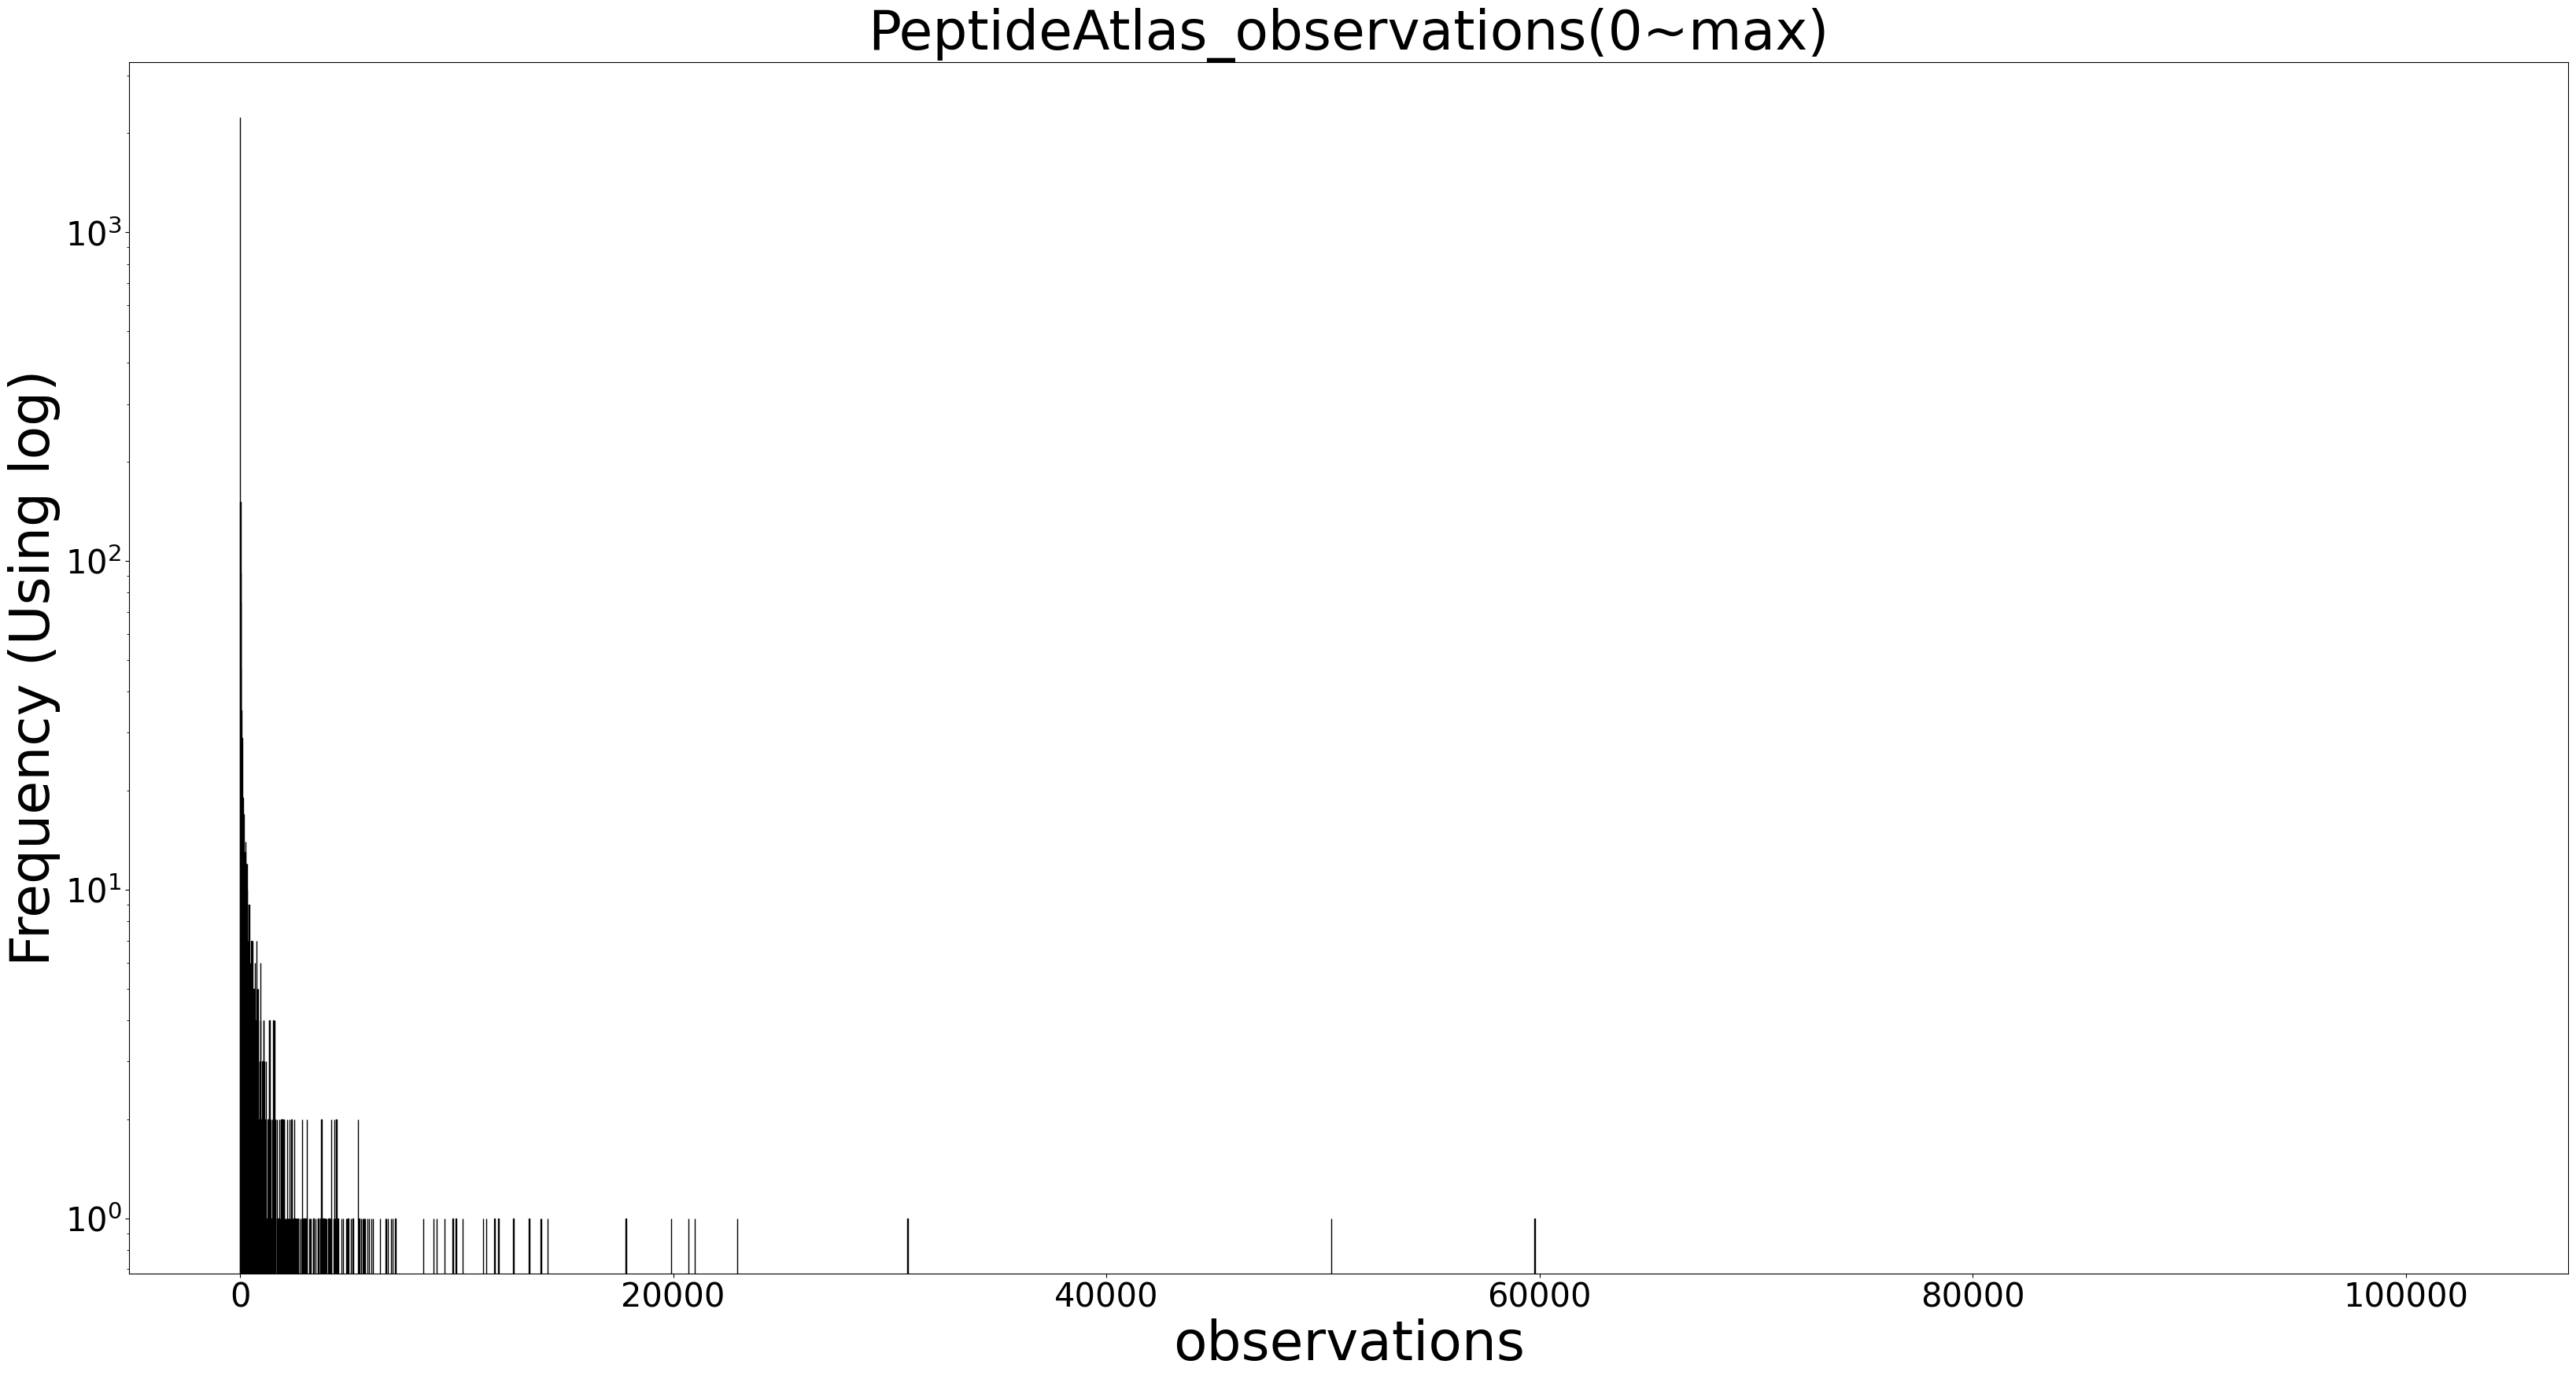

In [51]:
bins = range(0, 102375, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~max)', fontsize=50)
plt.show()

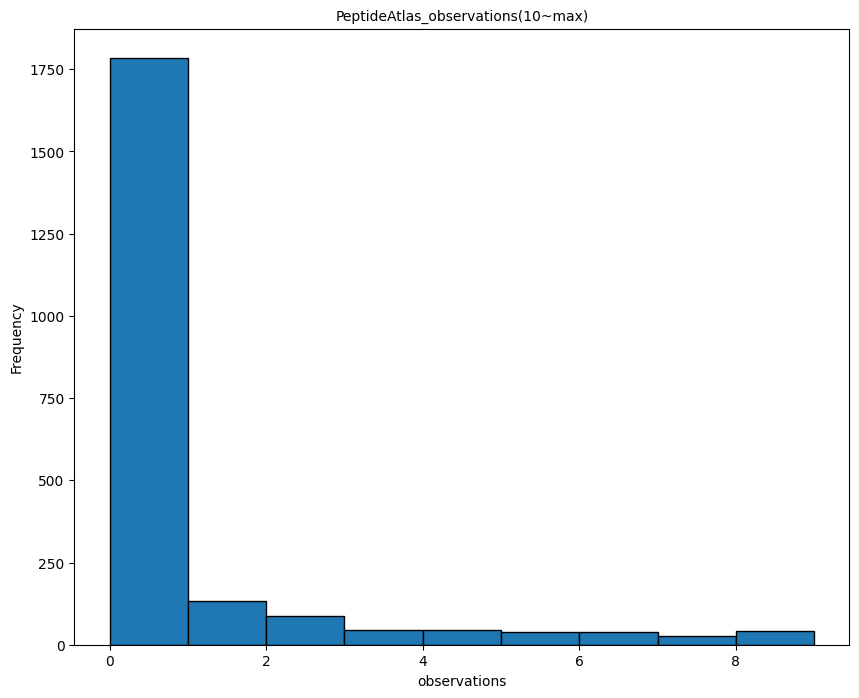

In [21]:
bins = range(0, 10, 1)
plt.figure(figsize=(10, 8))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('PeptideAtlas_observations(10~max)', fontsize=10)
plt.show()

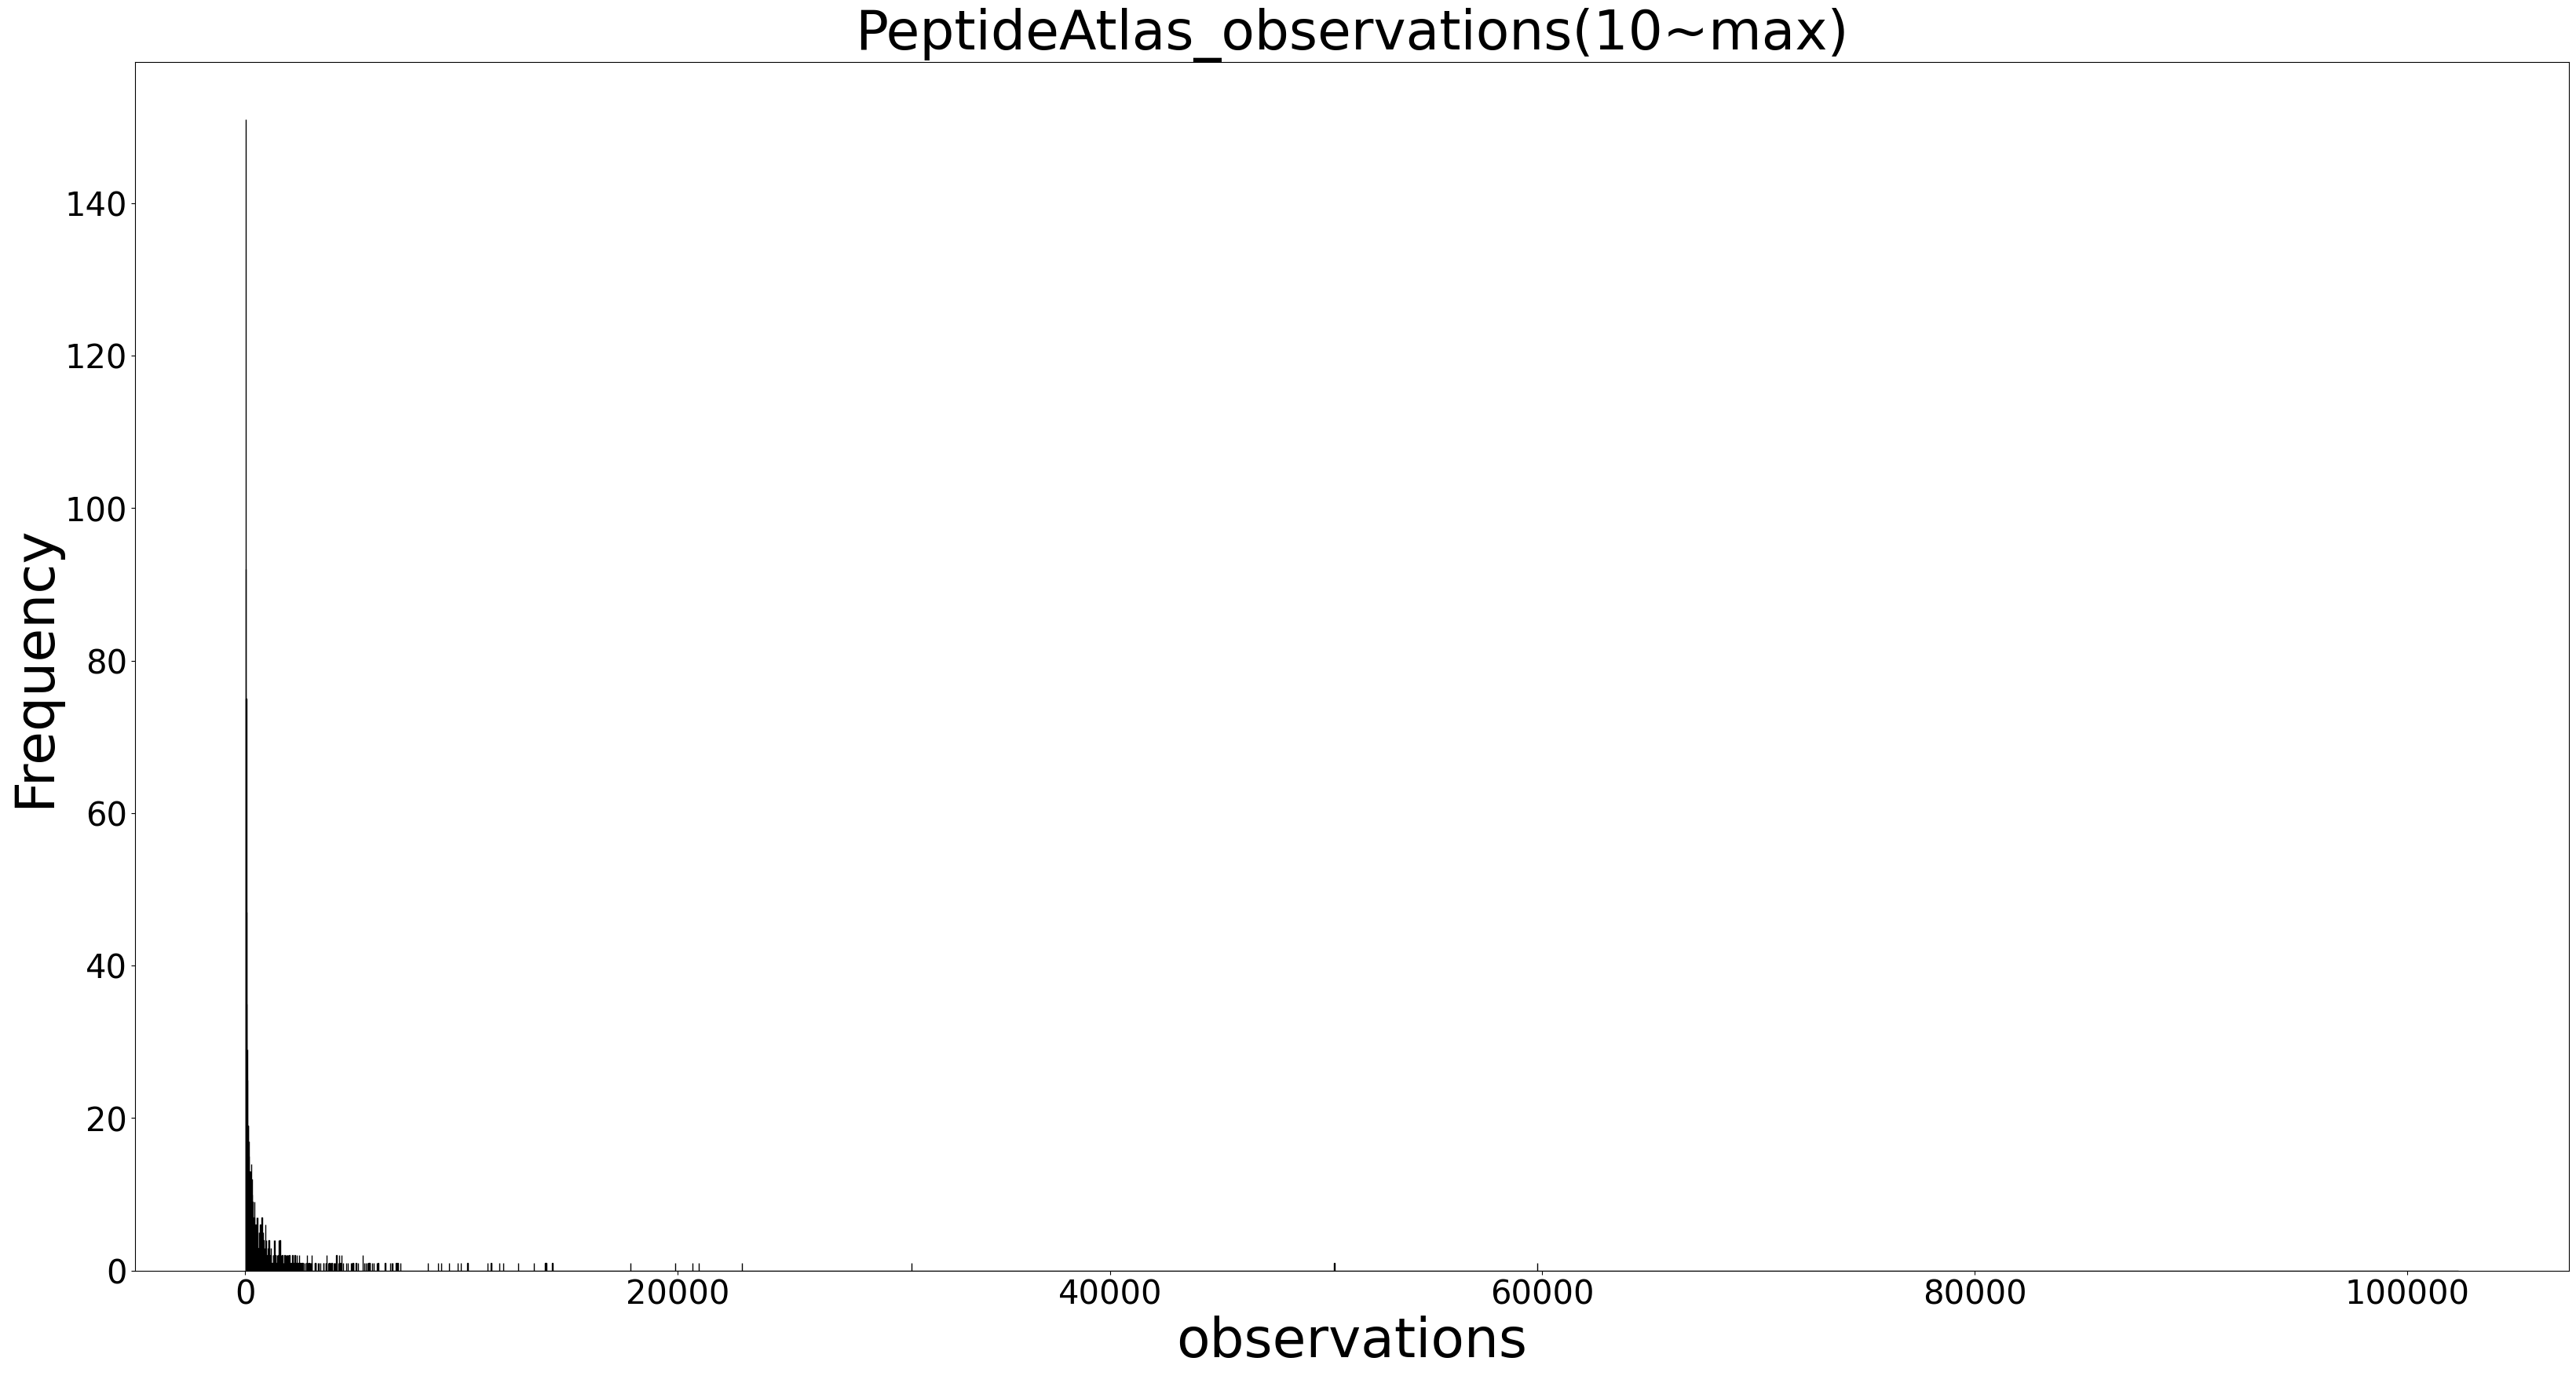

In [52]:
bins = range(10, 102375, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(10~max)', fontsize=50)
plt.show()

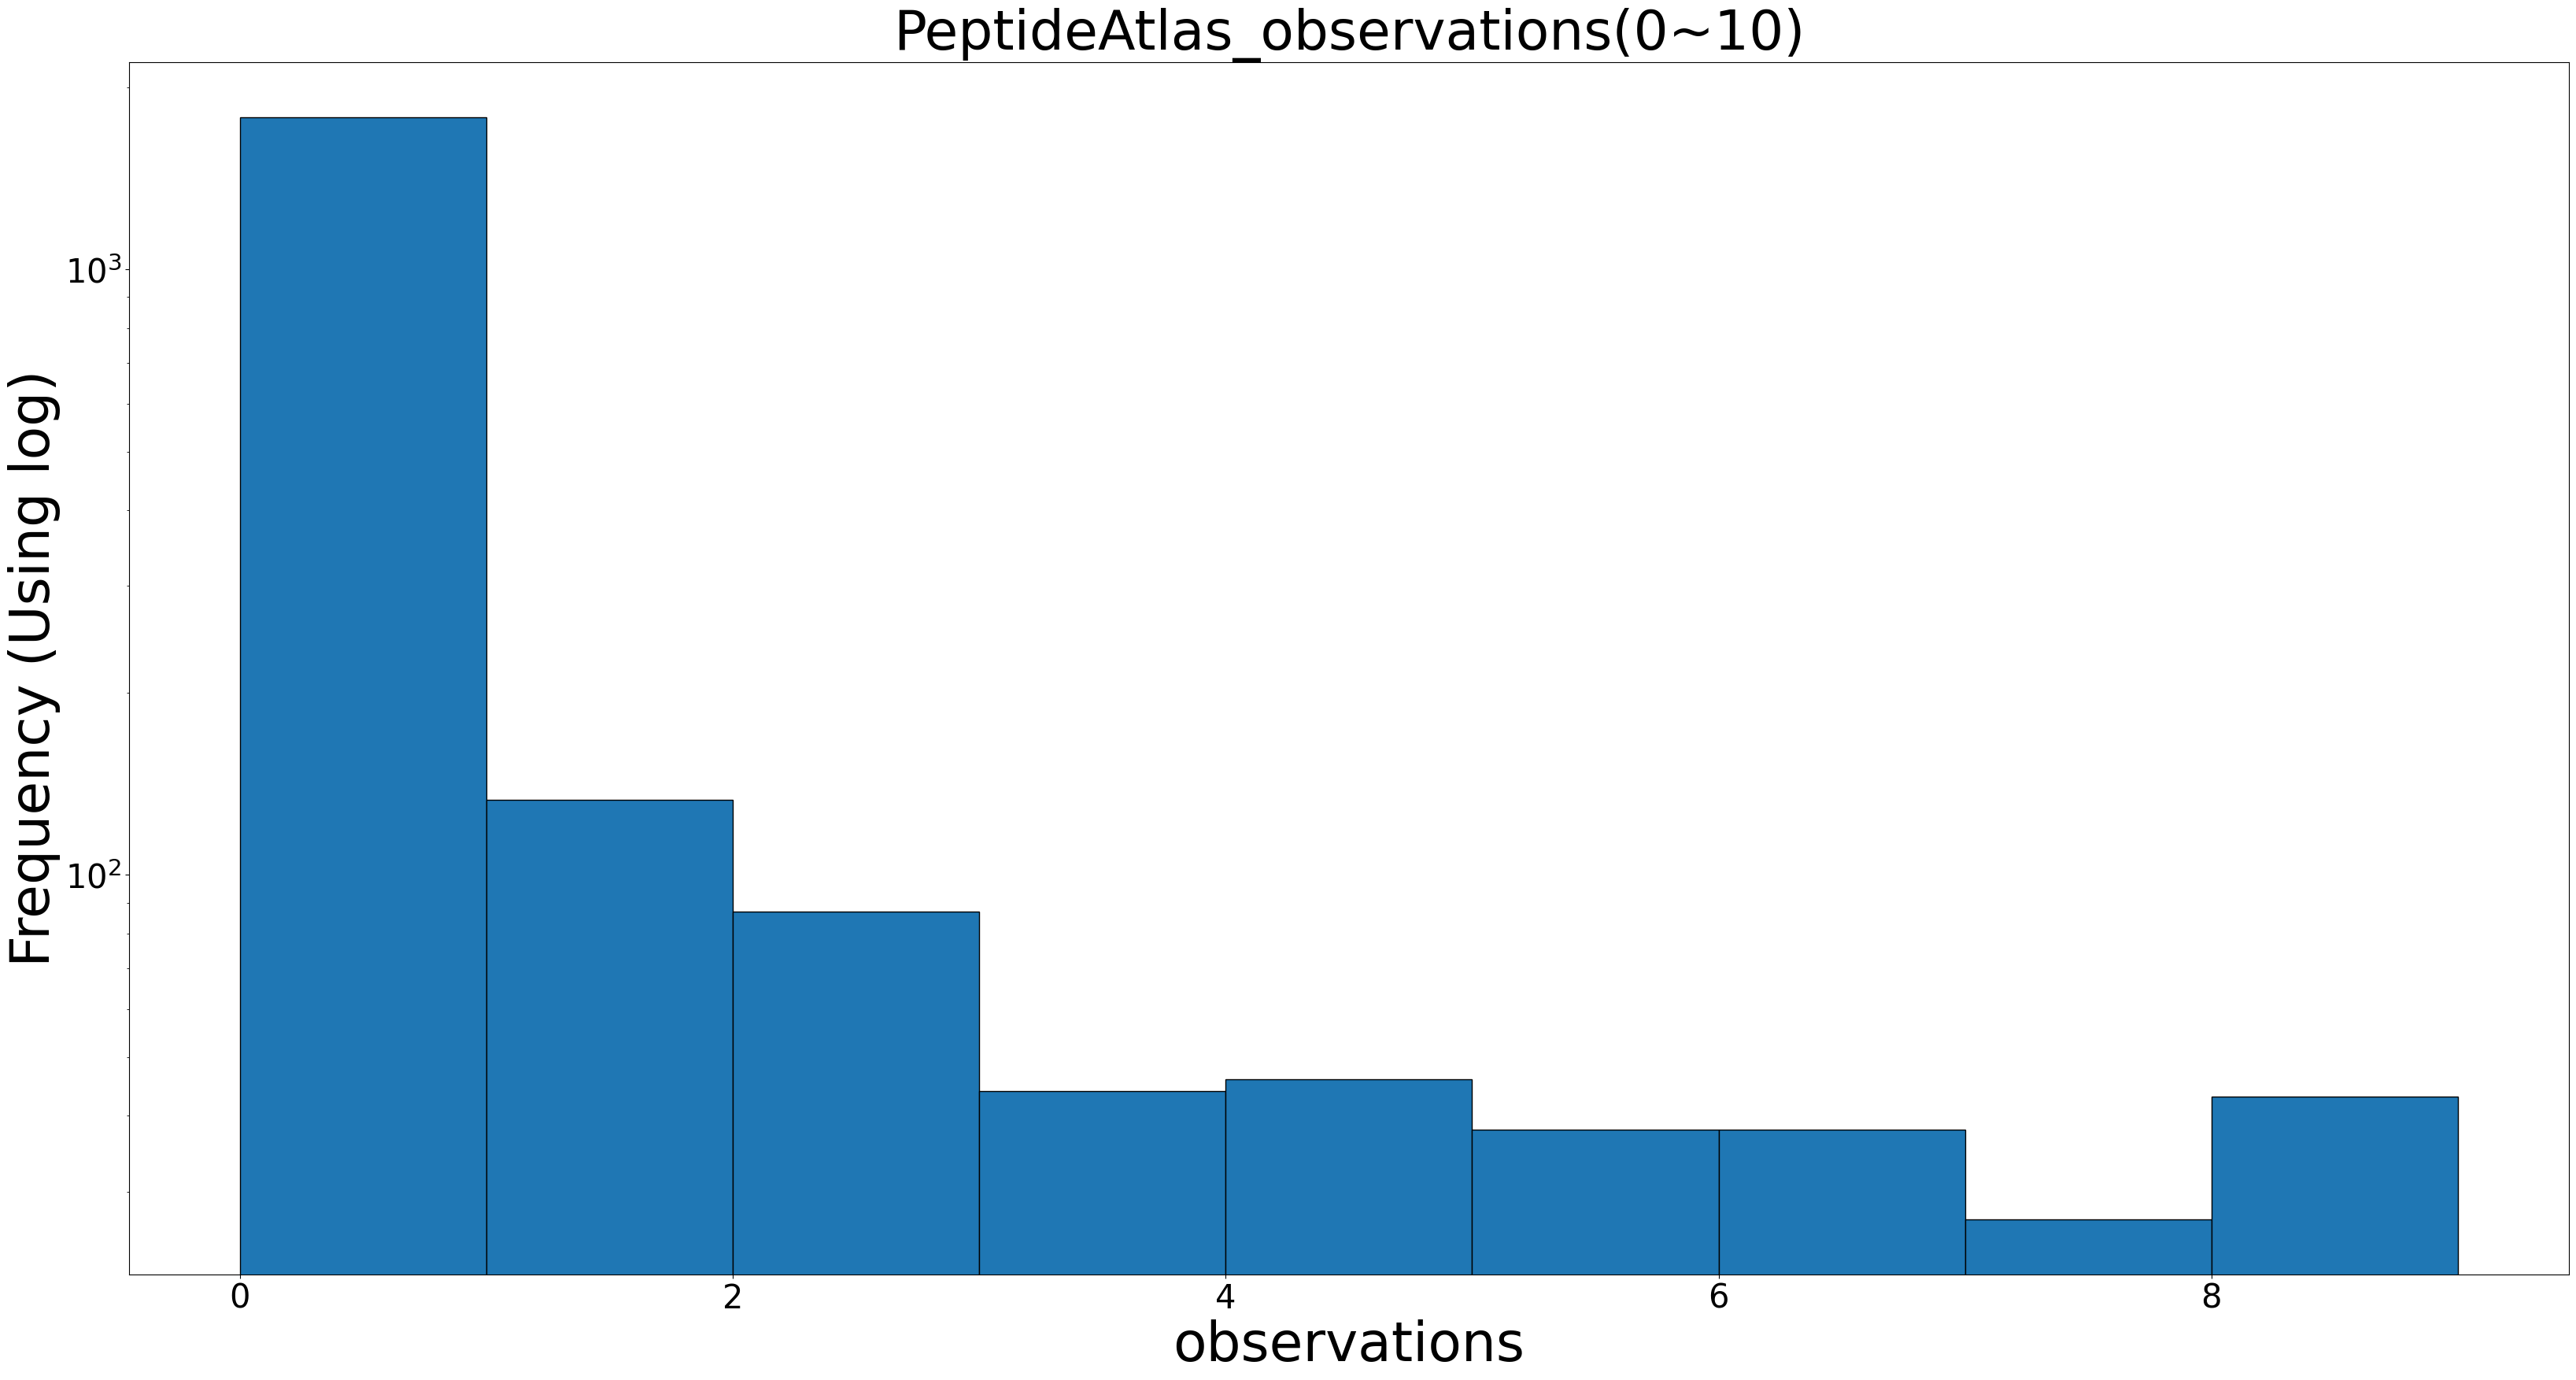

In [54]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~10)', fontsize=50)
plt.show()

#### GPMDB_observations

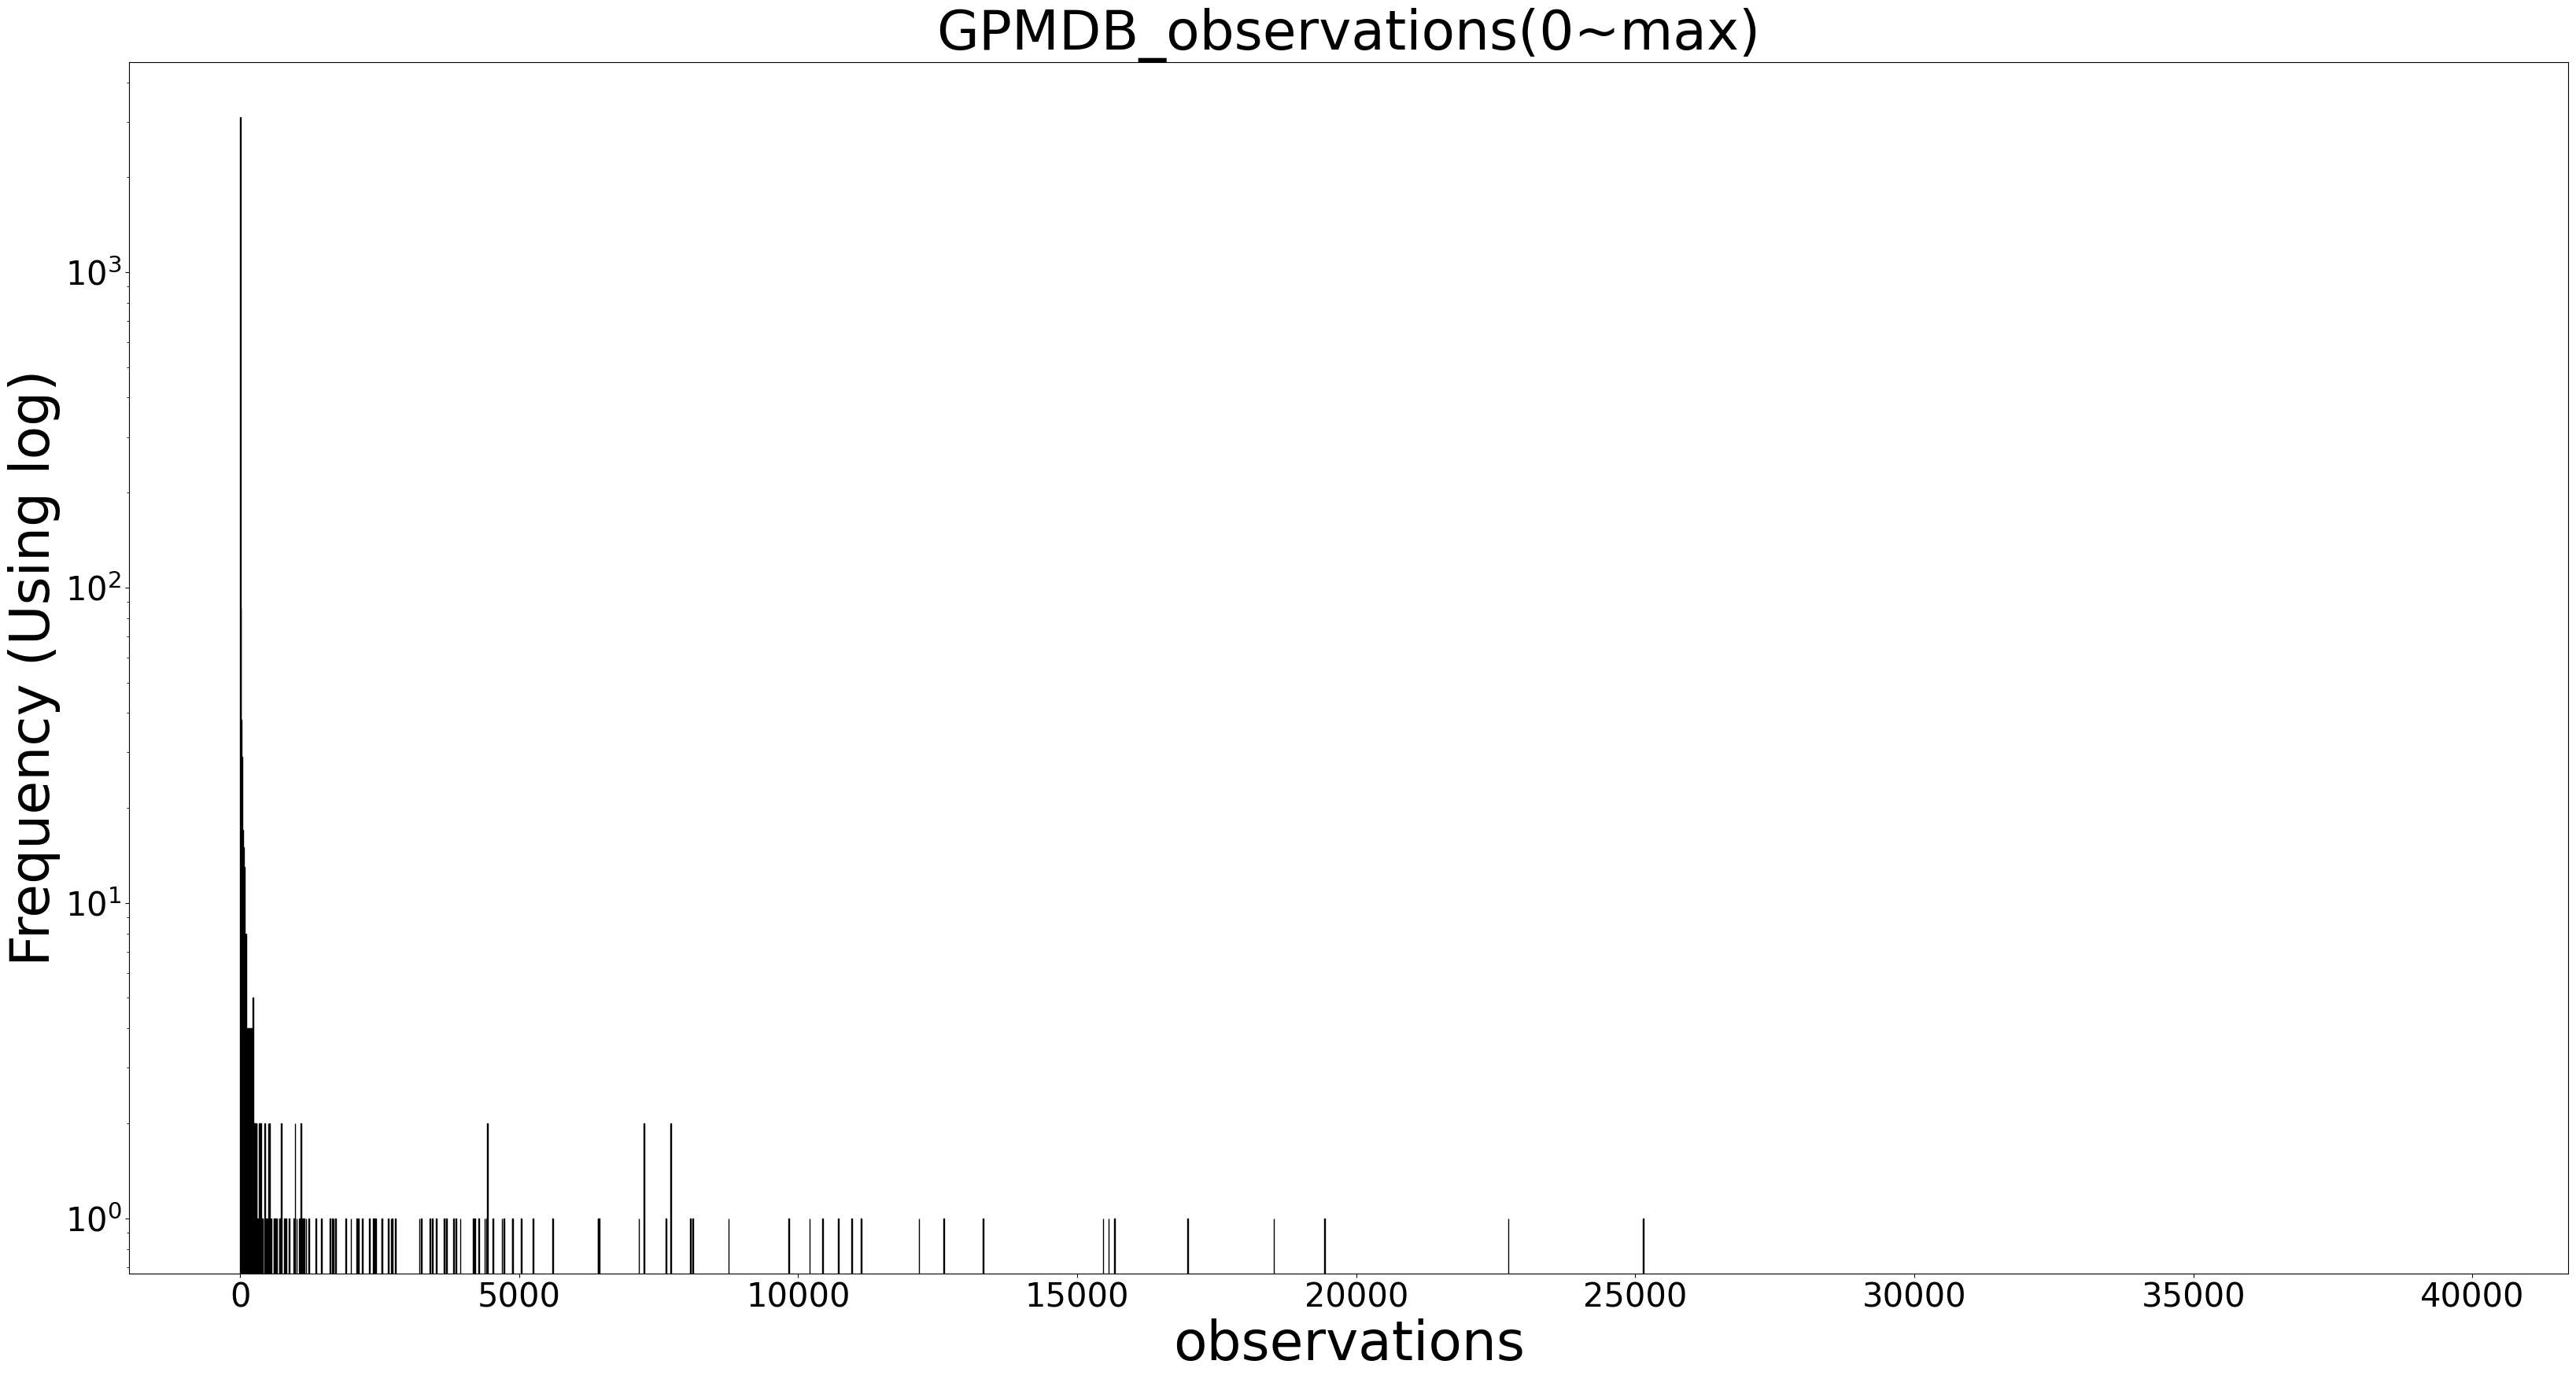

In [57]:
bins = range(0, 39731, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~max)', fontsize=50)
plt.show()

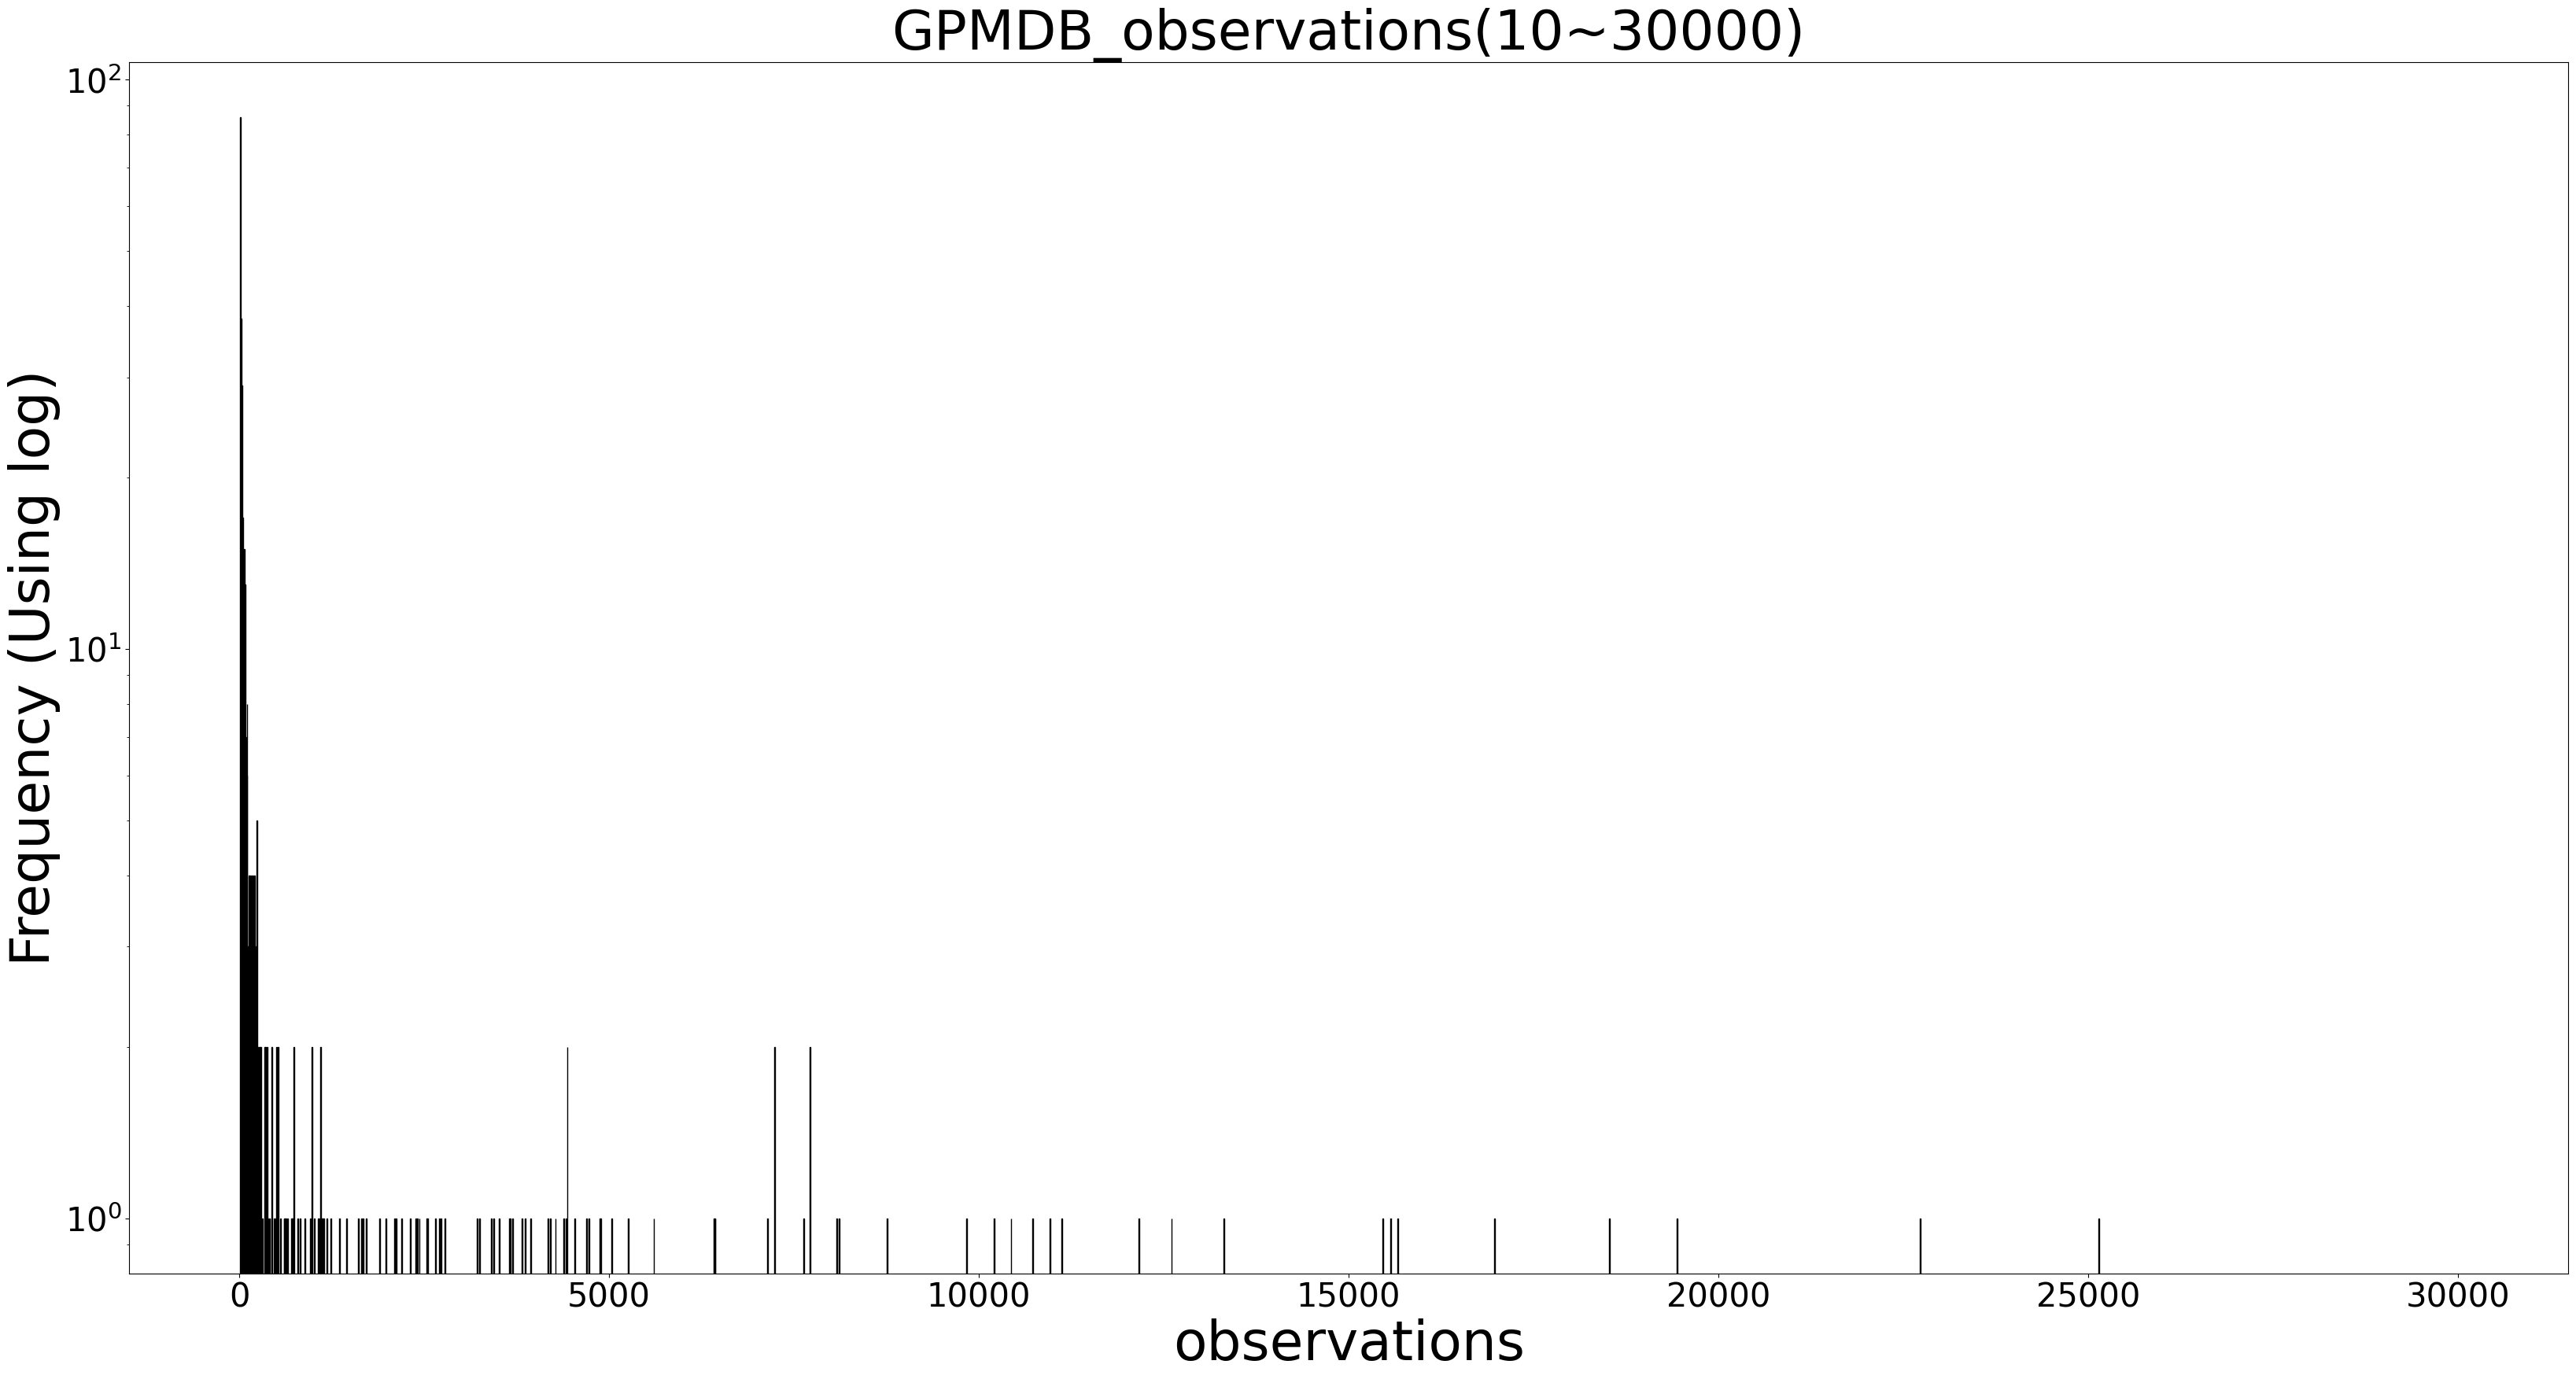

In [58]:
bins = range(10, 30000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~30000)', fontsize=50)
plt.show()

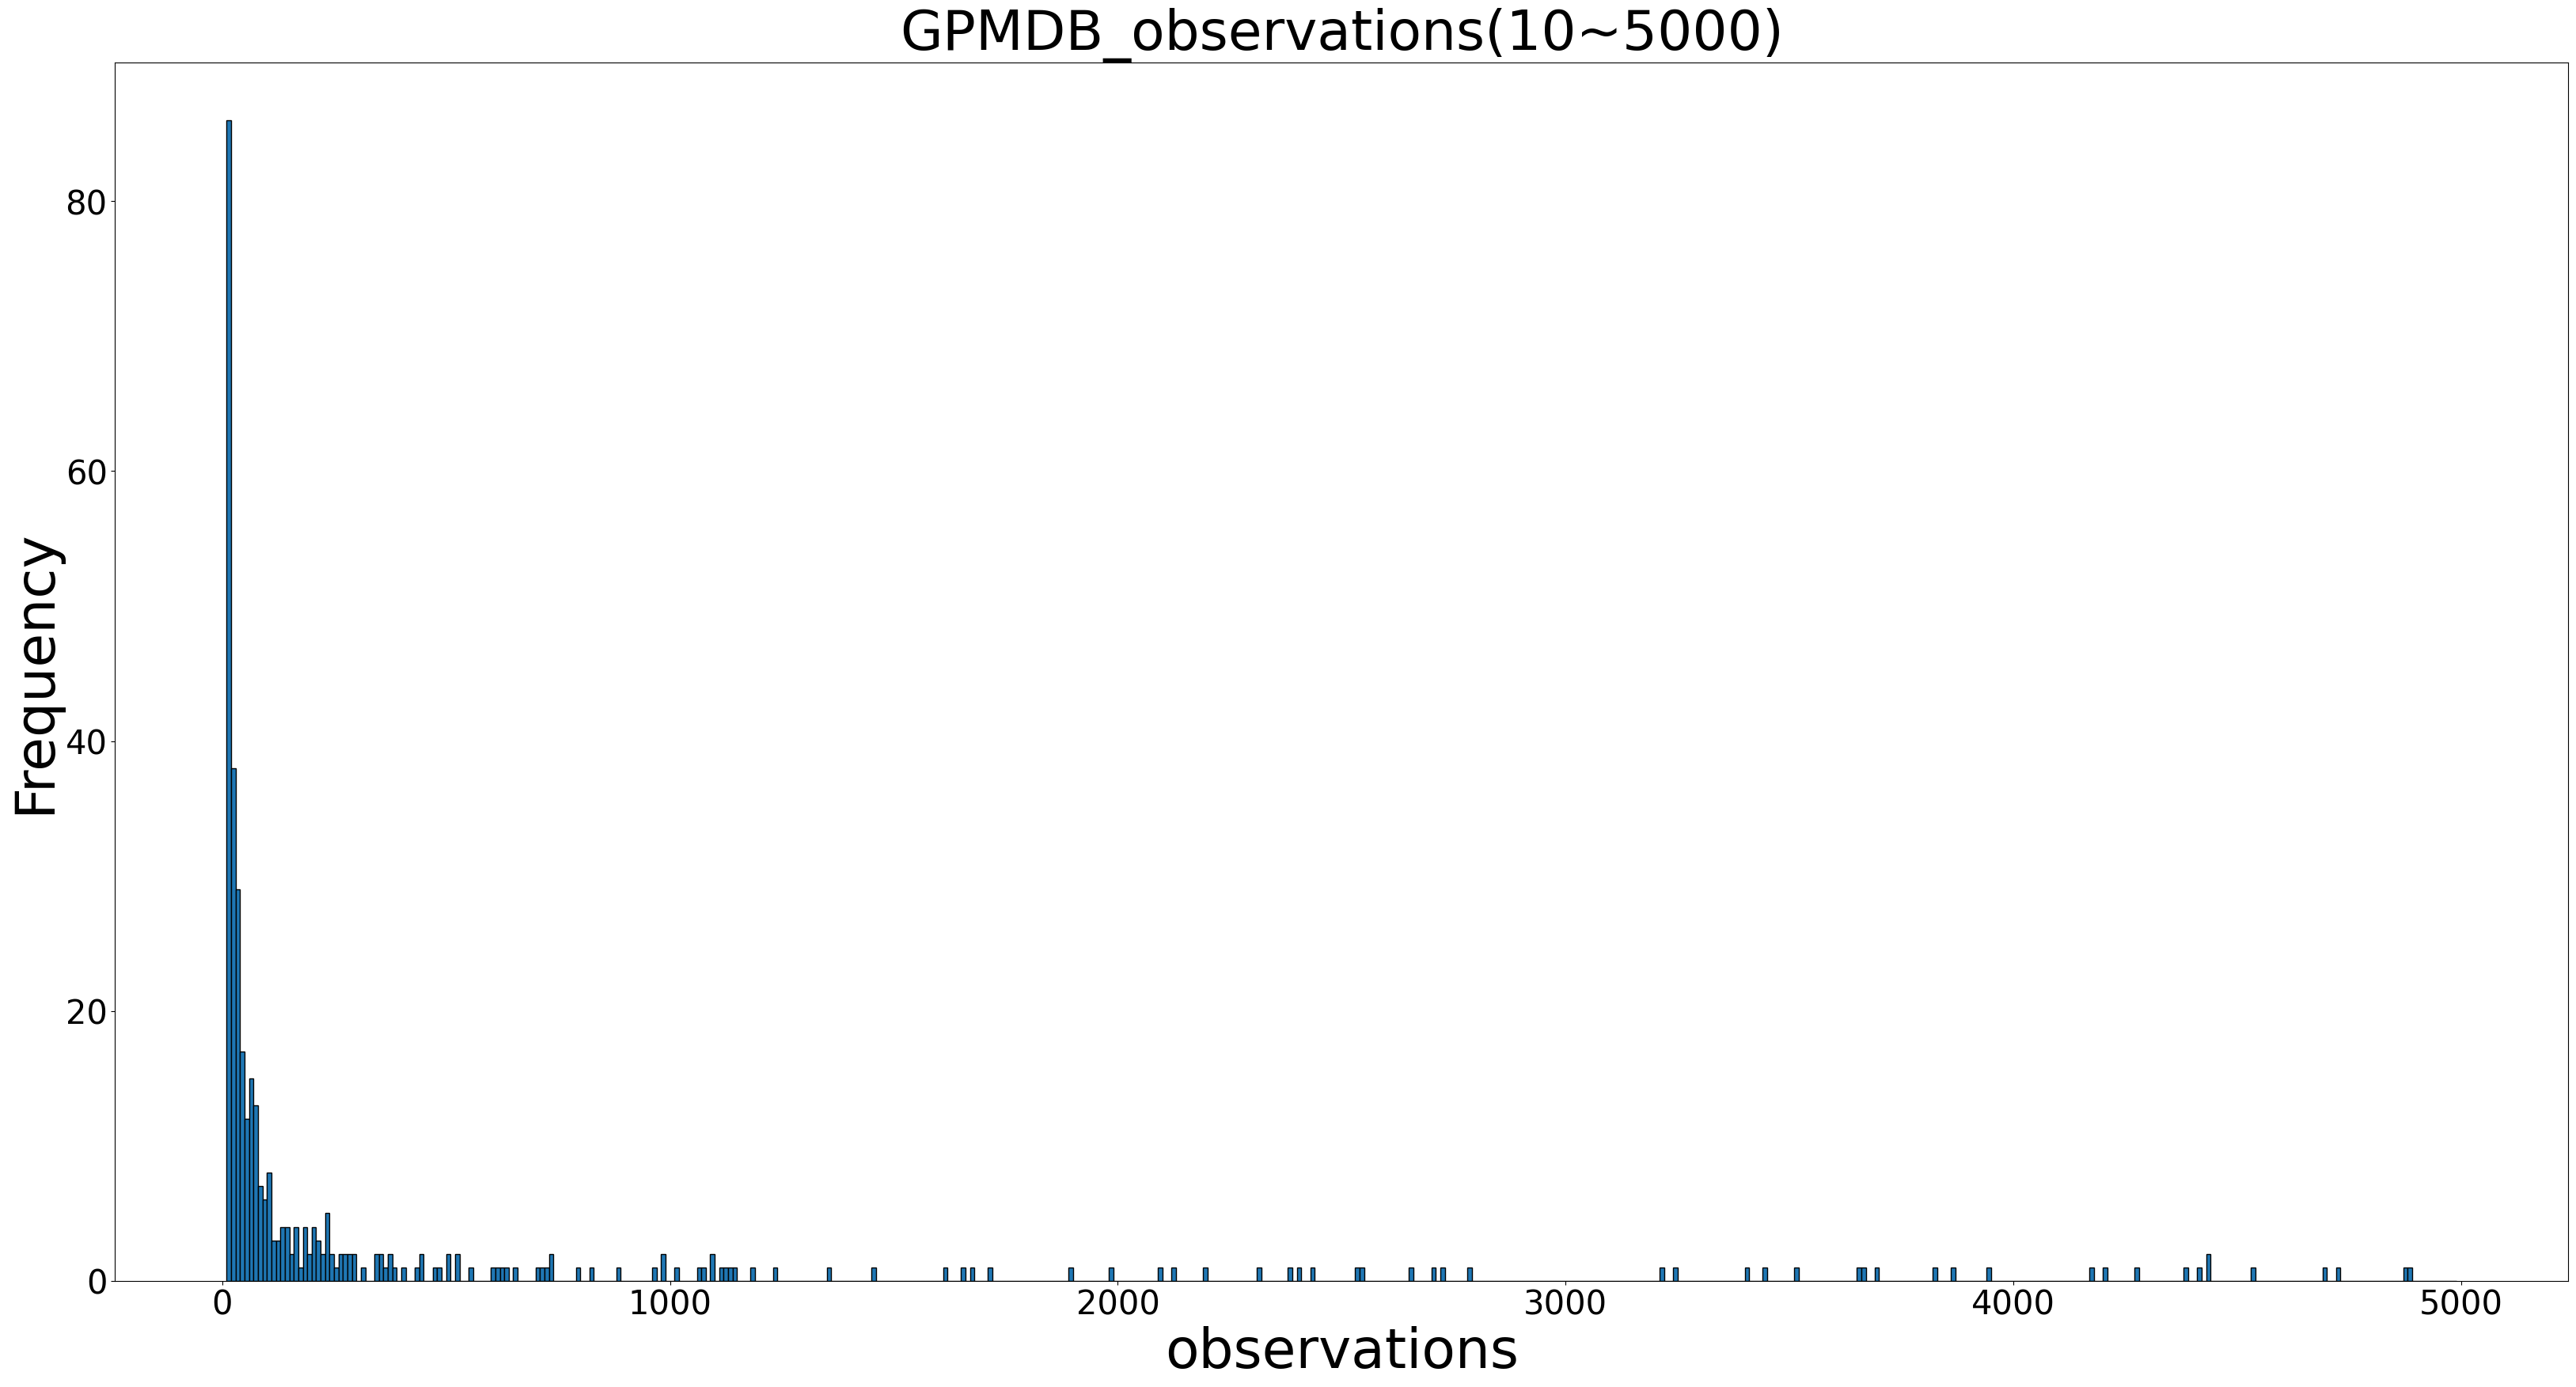

In [59]:
bins = range(10, 5000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~5000)', fontsize=50)
plt.show()

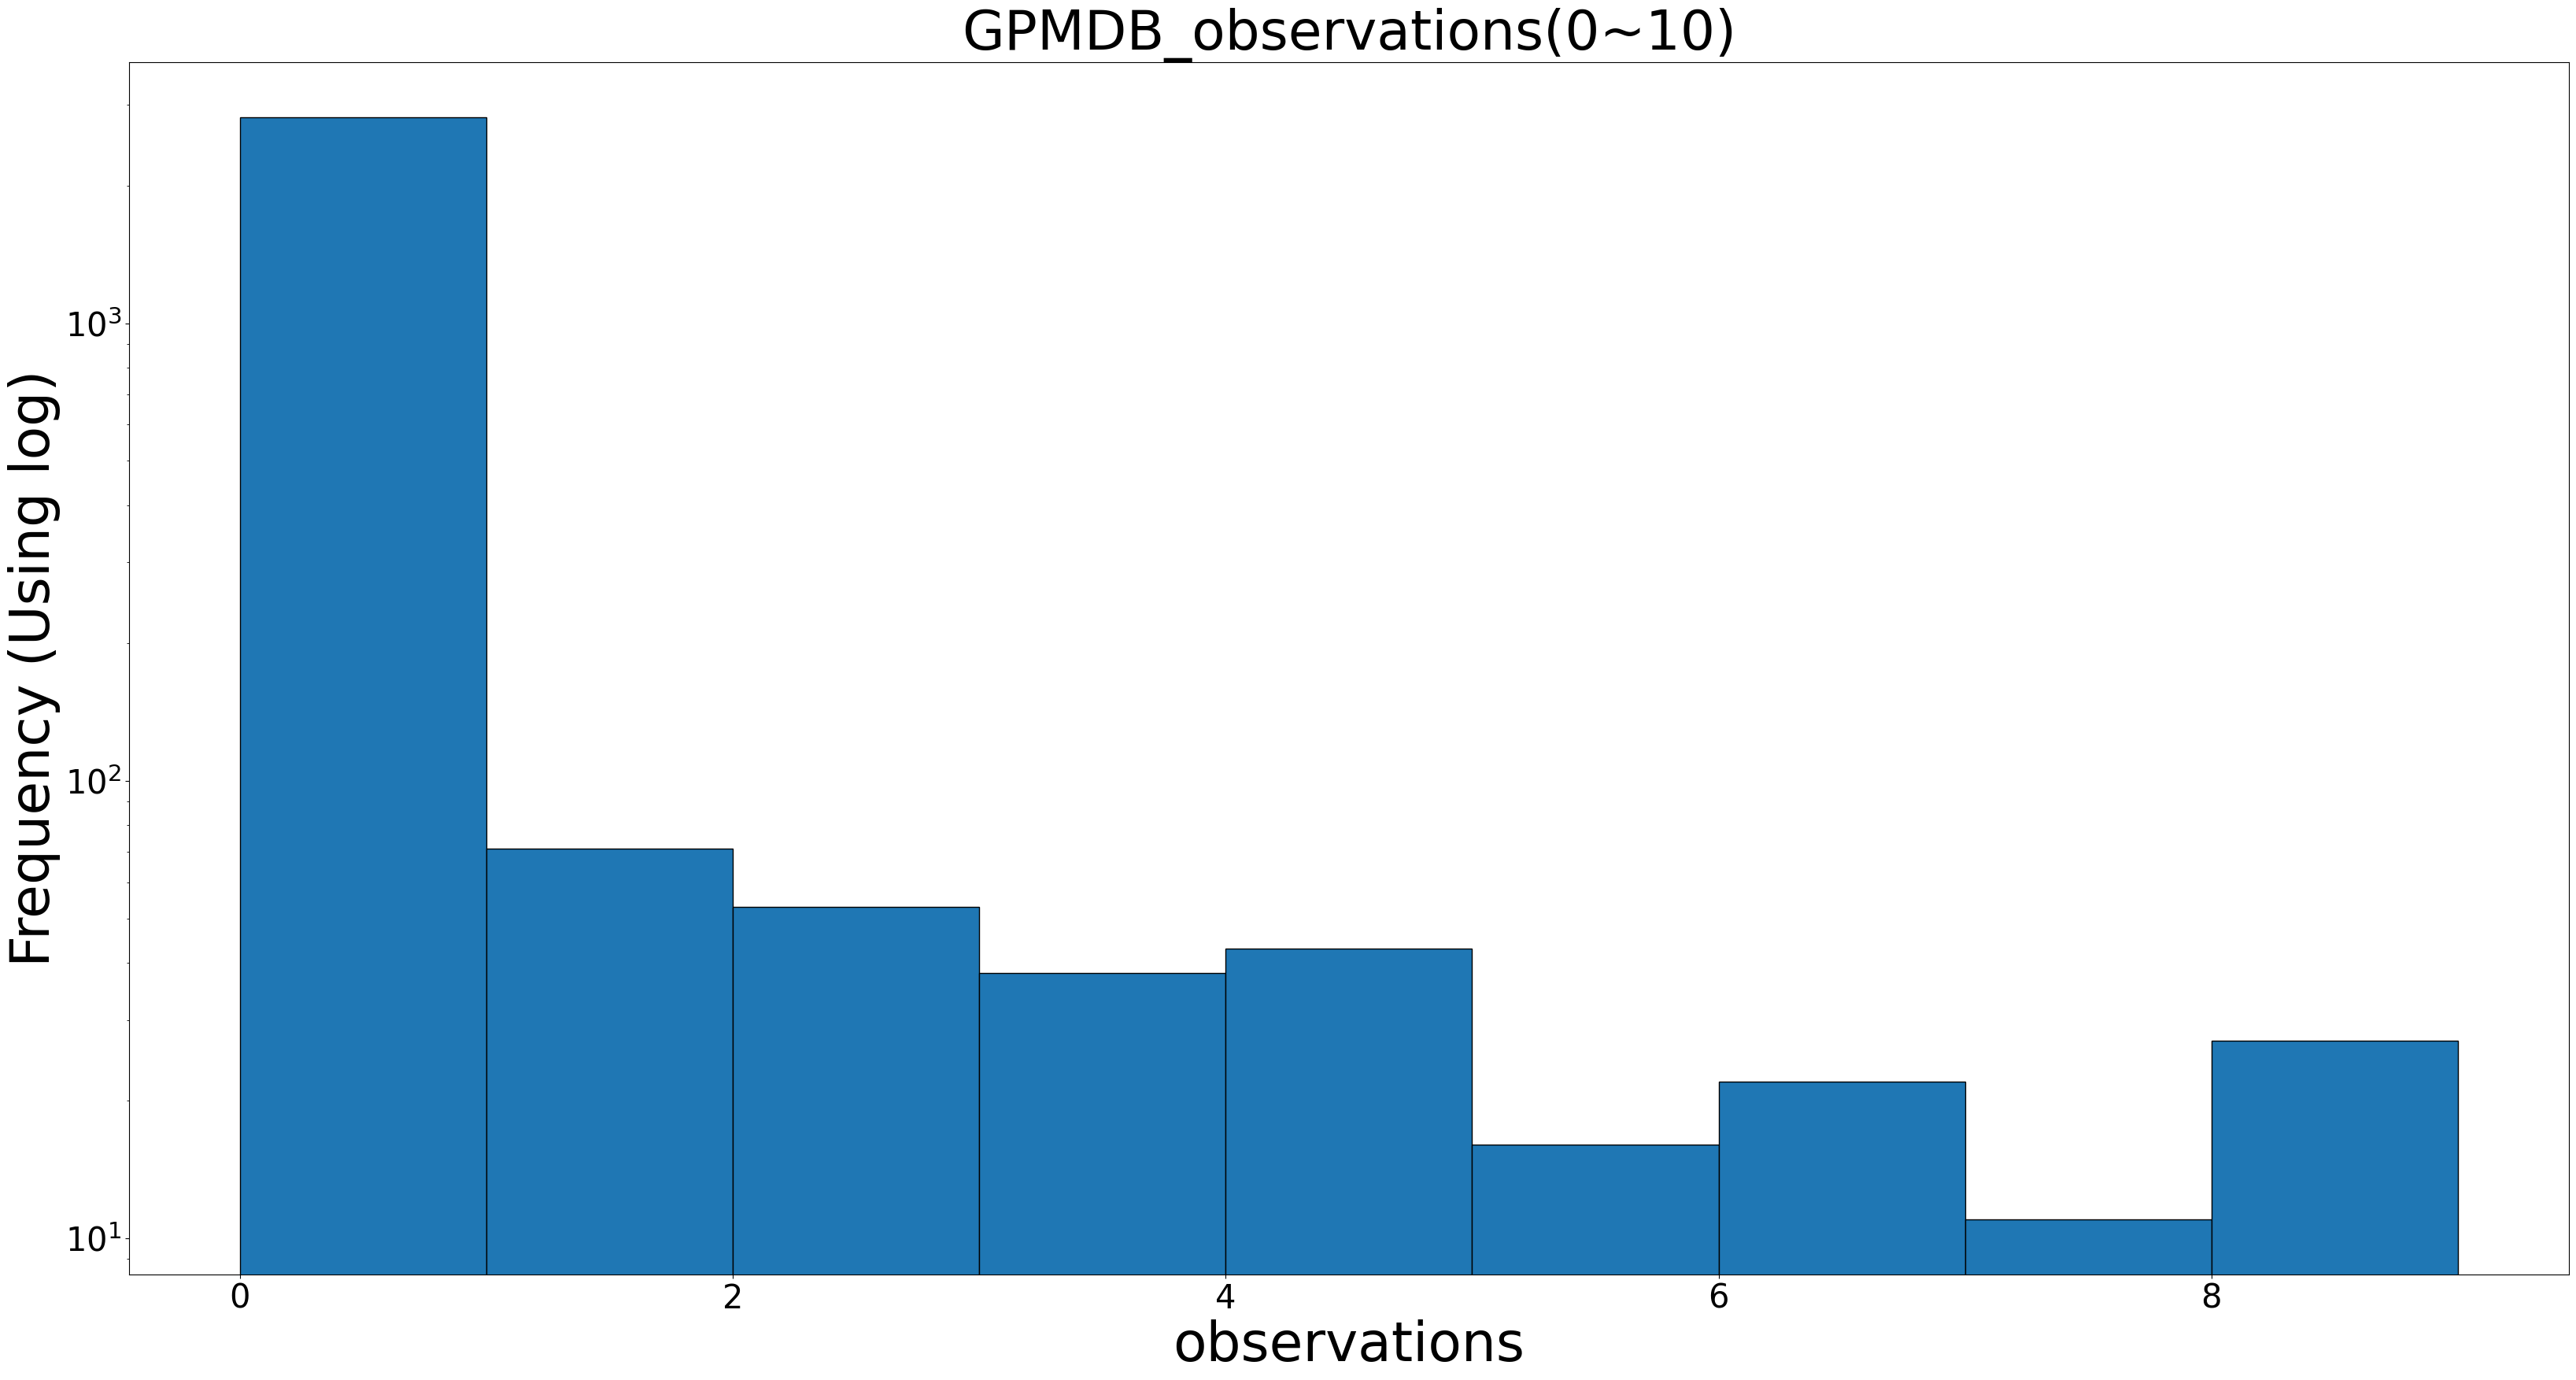

In [60]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~10)', fontsize=50)
plt.show()

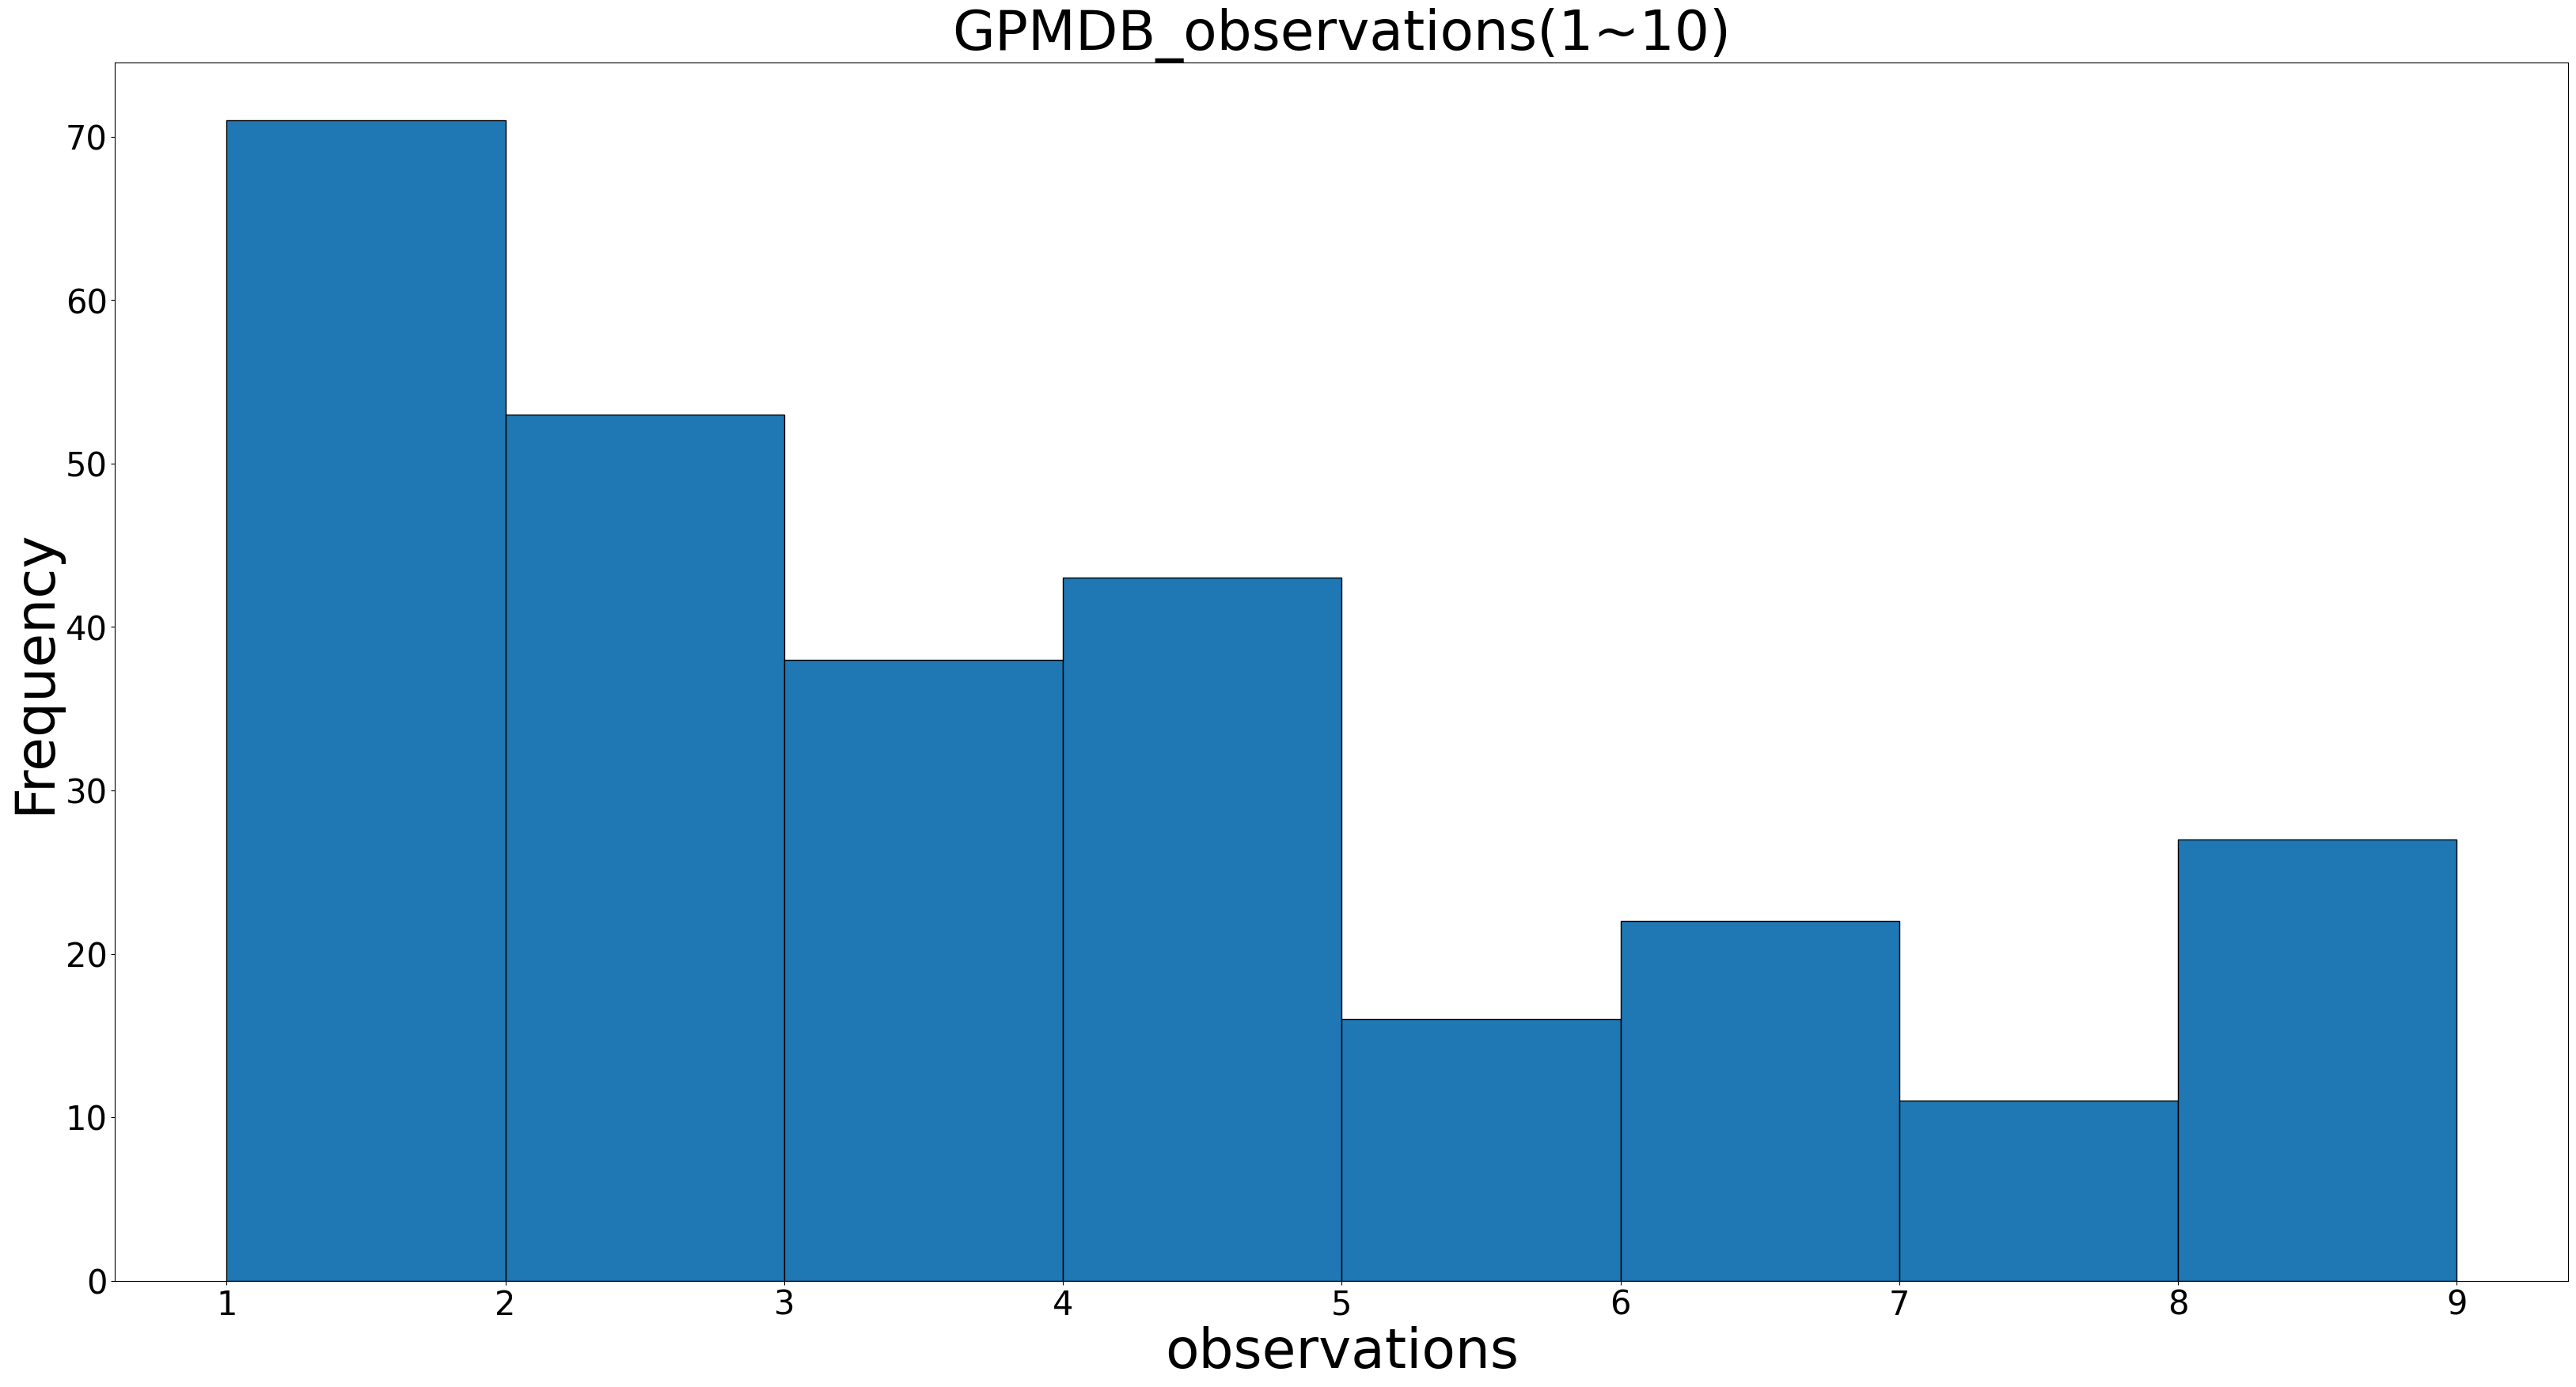

In [61]:
bins = range(1, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(1~10)', fontsize=50)
plt.show()